# Sunspots
* Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs, with each member having the opposite magnetic polarity.
* Analyzing sunspots involves studying their various characteristics, including:
  - **Size and Number**: Tracking the size and number of sunspots can help understand the solar cycle.
  - **Location**: Sunspots tend to appear in certain latitudes, known as sunspot belts, which change over the solar cycle.
  - **Magnetic Field**: The magnetic structure of sunspots is complex and can lead to solar flares and coronal mass ejections.
  - **Lifecycle**: Sunspots can last from a few days to a few months and their development and decay provide insights into solar dynamics.

In [1]:
%%capture
!pip install sunpy
!pip install zeep
!pip install drms
!pip install Glymur
!pip install ipympl

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import astropy.units as u
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.physics.differential_rotation import diff_rot
from math import degrees
from astropy.utils.exceptions import AstropyWarning
import warnings
warnings.simplefilter("ignore",category=AstropyWarning)
%matplotlib inline
plt.style.use("dark_background")

In [3]:
from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets

## Basic Example

In [4]:
timeRange = a.Time("2023-01-01T00:00:00","2023-01-02T00:00:00") # Adjust dates as needed

In [5]:
dataResult = Fido.search(timeRange,a.Instrument("HMI"),a.Sample(24*u.hour))

In [6]:
dataResult

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str18,str6,str4,str4,str8,float64
2023-01-01 00:00:22.000,2023-01-01 00:00:23.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098
2023-01-01 00:00:22.000,2023-01-01 00:00:23.000,SDO,HMI,6173.0 .. 6174.0,JSOC,LOS_magnetic_field,NARROW,4096,4096,FULLDISK,-0.00098
2023-01-01 00:00:22.000,2023-01-01 00:00:23.000,SDO,HMI,6173.0 .. 6174.0,JSOC,LOS_velocity,NARROW,4096,4096,FULLDISK,-0.00098


In [7]:
data = dataResult[0,0]

In [8]:
data

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,fileid
,,,,Angstrom,,,,,,,Mibyte,
Time,Time,str3,str3,float64[2],str4,str18,str6,str4,str4,str8,float64,str29
2023-01-01 00:00:22.000,2023-01-01 00:00:23.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098,hmi__ic_45s:21037442:21037442


In [9]:
files = Fido.fetch(data)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi_ic_45s_2023_01_01_00_01_30_tai_continuum.fits:   0%|          | 0.00/16.2M [00:00<?, ?B/s]

In [10]:
files

['/root/sunpy/data/hmi_ic_45s_2023_01_01_00_01_30_tai_continuum.fits']

In [11]:
dataFile = files[0]

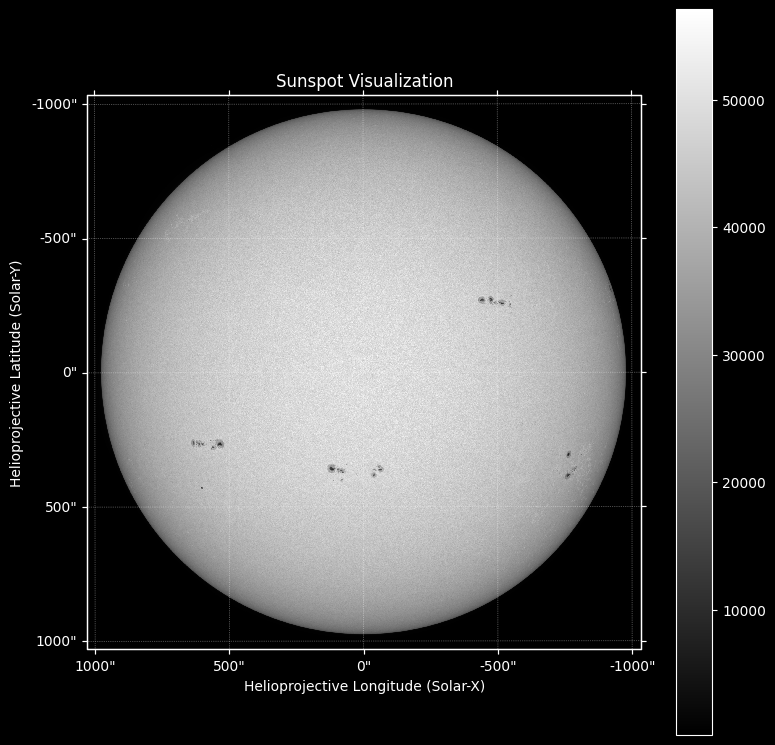

In [12]:
sunspotMap = sunpy.map.Map(dataFile)
plt.figure(figsize=(8,8))
sunspotMap.plot()
plt.colorbar()
plt.title("Sunspot Visualization")
plt.tight_layout()
plt.show()

Observatory,SDO
Instrument,HMI FRONT2
Detector,HMI
Measurement,continuum
Wavelength,6173.0
Observation Date,2023-01-01 00:00:22
Exposure Time,Unknown
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.504025 0.504025] arcsec / pix
Reference Pixel,[2040.536499 2045.376465] pix

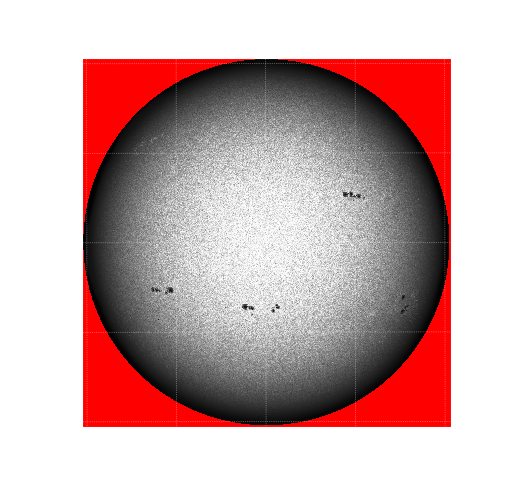
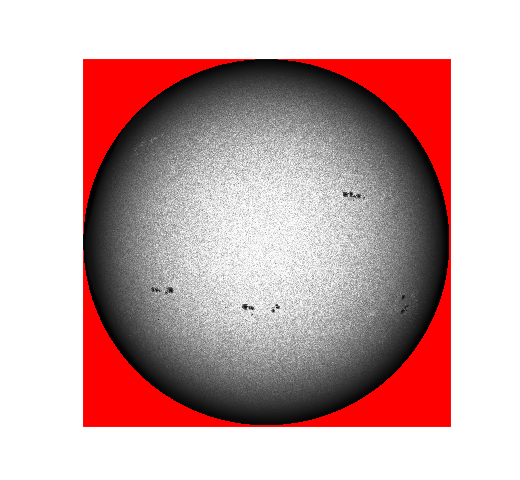
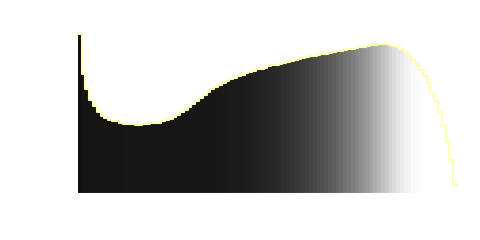
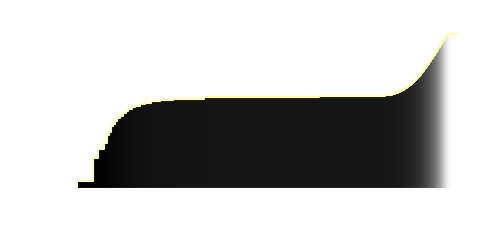

In [13]:
sunspotMap

# Before Sunspot Theory

In [24]:
randomInterval = np.linspace(0,2*np.pi,18)
xValues = np.cos(randomInterval)
yValues = np.sin(randomInterval)

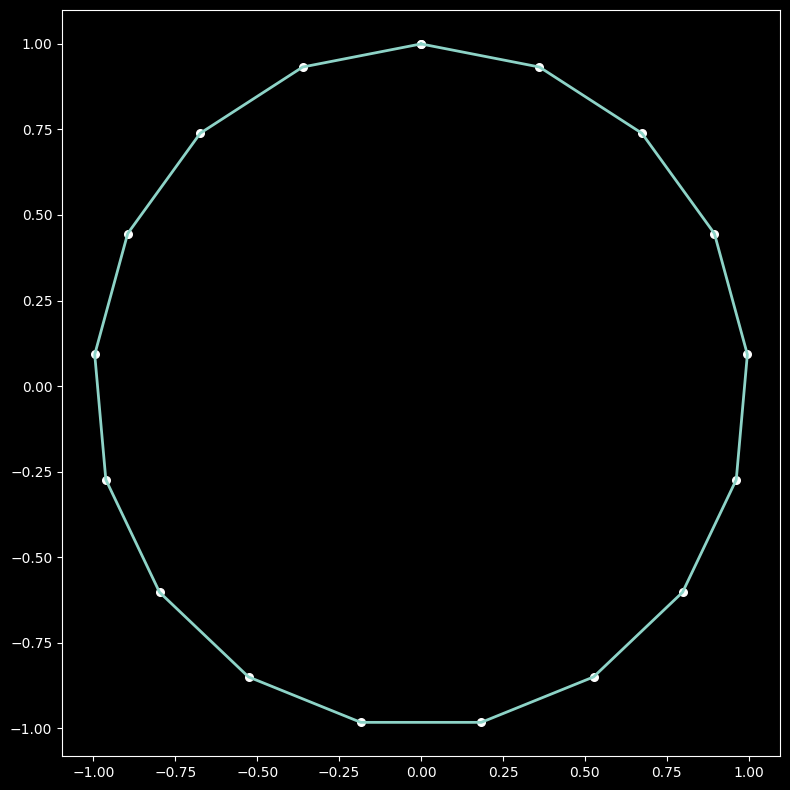

In [30]:
figure = plt.figure(1,figsize=(8,8))
plt.scatter(yValues,xValues,s=30,c="white")
plt.plot(yValues,xValues,lw=2)
plt.tight_layout()
plt.show()

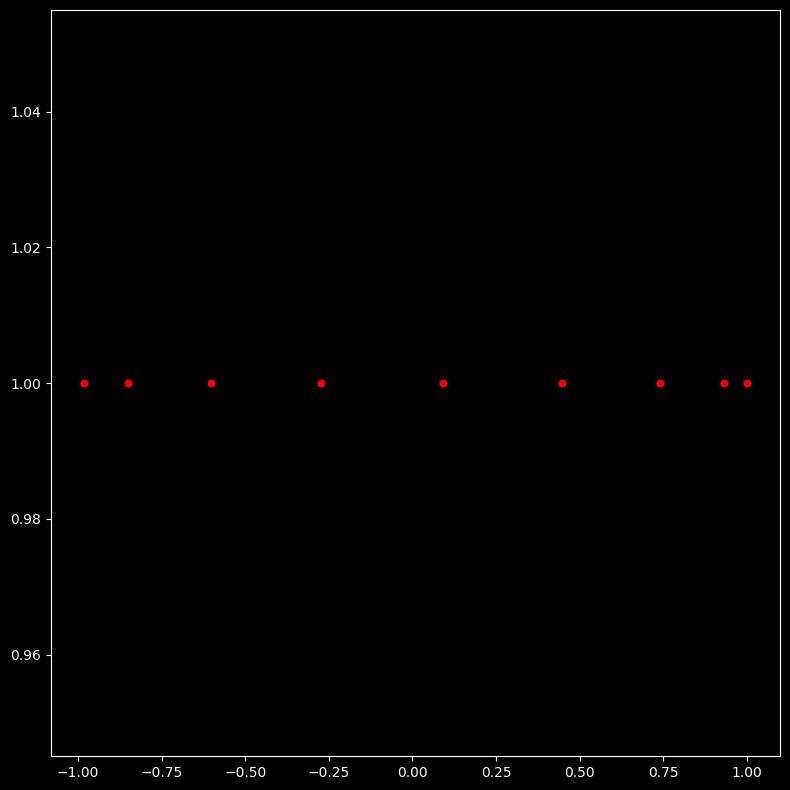

In [31]:
figure = plt.figure(1,figsize=(8,8))
plt.scatter(xValues,np.ones(len(xValues)),s=20,c="red")
plt.tight_layout()
plt.show()

In [32]:
xValues

array([ 1.        ,  0.93247223,  0.73900892,  0.44573836,  0.09226836,
       -0.27366299, -0.60263464, -0.85021714, -0.9829731 , -0.9829731 ,
       -0.85021714, -0.60263464, -0.27366299,  0.09226836,  0.44573836,
        0.73900892,  0.93247223,  1.        ])

In [33]:
shiftedList = []
for index in xValues:
  if index < 0:
    shiftedList.append(1+abs(index))
  else:
    shiftedList.append(1-abs(index))

In [34]:
shiftedList

[0.0,
 0.06752777059564419,
 0.2609910827793409,
 0.5542616442234617,
 0.907731640536698,
 1.2736629900720828,
 1.6026346363792563,
 1.8502171357296142,
 1.982973099683902,
 1.982973099683902,
 1.850217135729614,
 1.6026346363792565,
 1.273662990072083,
 0.9077316405366984,
 0.5542616442234615,
 0.2609910827793408,
 0.06752777059564419,
 0.0]

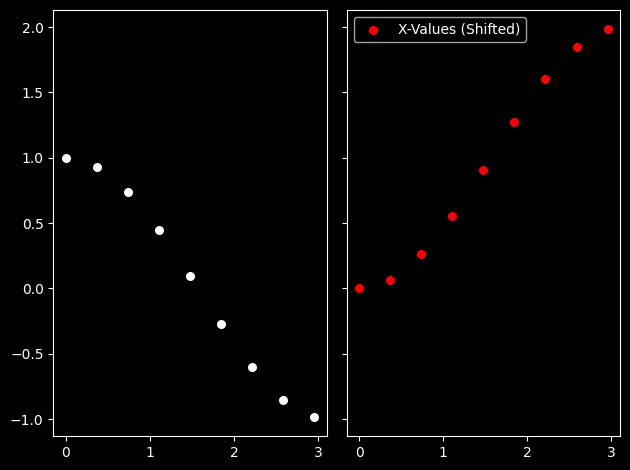

In [37]:
figure,(axs1,axs2) = plt.subplots(1,2,sharey=True)
half = int(np.floor(len(randomInterval)/2))
axs1.scatter(randomInterval[:half],xValues[:half],c="white",s=30,label="X-Values (Cosine)")
axs2.scatter(randomInterval[:half],shiftedList[:half],c="red",s=30,label="X-Values (Shifted)")
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
polyFit1 = np.polyfit(randomInterval[:half],shiftedList[:half],1)

In [39]:
polyFit1

array([ 0.75228571, -0.16773215])

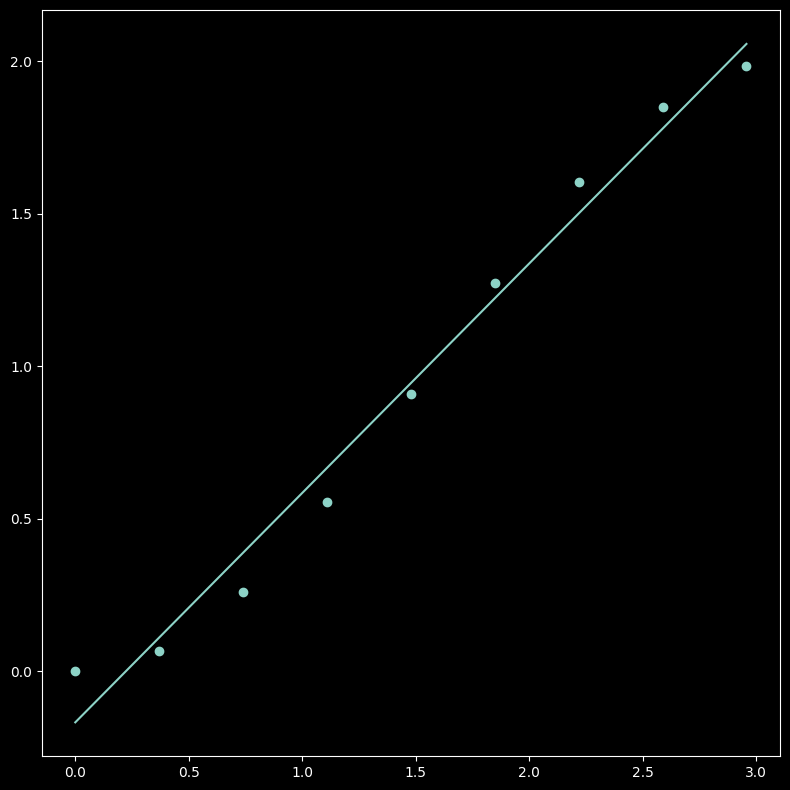

In [40]:
figure = plt.figure(figsize=(8,8))
axs = figure.add_subplot()
axs.scatter(randomInterval[:half],shiftedList[:half])
shiftedTheory = polyFit1[0]*randomInterval[:half]+polyFit1[1]
axs.plot(randomInterval[:half],shiftedTheory)
plt.tight_layout()
plt.show()

In [41]:
polyFit2 = np.polyfit(randomInterval[:half],shiftedList[:half],3,full=True)

In [42]:
polyFit2

(array([-0.14393338,  0.67647232, -0.0721269 ,  0.00293003]),
 array([8.13926168e-05]),
 4,
 array([1.88564038, 0.64135483, 0.1797991 , 0.02639395]),
 1.9984014443252818e-15)

In [43]:
shiftedTheory2 = polyFit2[0][0]*randomInterval[:half]**3+polyFit2[0][1]*randomInterval[:half]**2+polyFit2[0][2]*randomInterval[:half]+polyFit2[0][3]

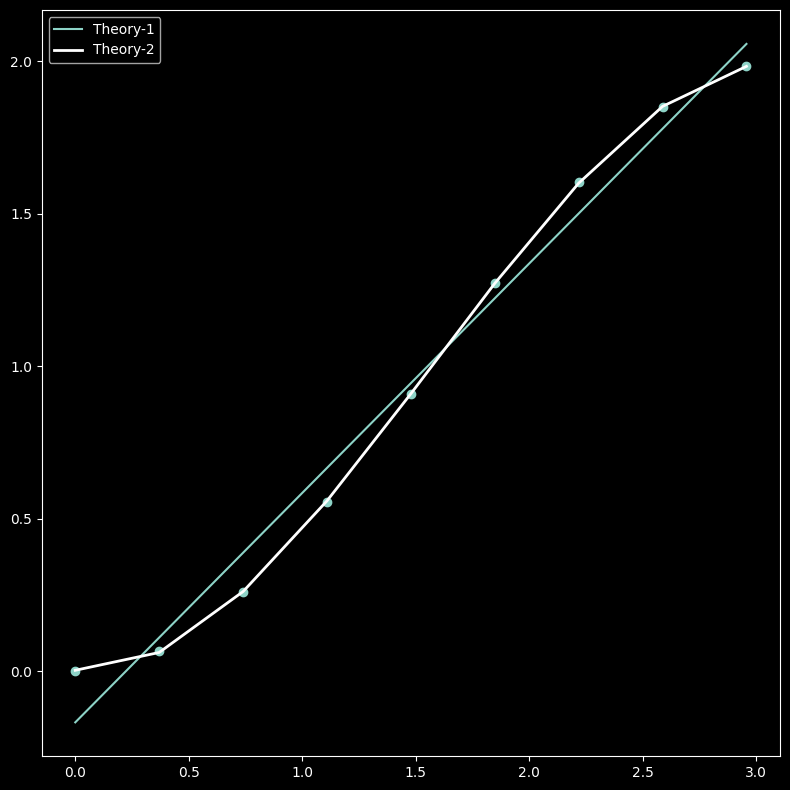

In [46]:
figure = plt.figure(figsize=(8,8))
axs = figure.add_subplot()
axs.scatter(randomInterval[:half],shiftedList[:half])
axs.plot(randomInterval[:half],shiftedTheory,label="Theory-1")
axs.plot(randomInterval[:half],shiftedTheory2,color="white",lw=2,label="Theory-2")
plt.legend()
plt.tight_layout()
plt.show()

**The realtionship between the x displacement and time is**:
> $x = A \cdot sin(\frac{2 \pi}{T} \cdot t)$

  where:

  $A$: the maximum displacement of a sunspot, at that solar latitude, from the line of 0 longitude ie the y-axis

  $T$: rotation period

  If we re-arrange our equation as follows:

  > $\arcsin(\frac{x}{A}) = \frac{2 \pi}{T} \cdot t$


# Complex Example

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
%matplotlib widget

In [14]:
result = Fido.search(
    a.Time("2015/05/05 12:00","2015/05/11 12:00"),
    a.Instrument("HMI"),
    a.Sample(0.5*u.day),
    a.Physobs("intensity")
)

In [15]:
result

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2015-05-05 12:00:36.000,2015-05-05 12:00:37.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098
2015-05-06 00:00:36.000,2015-05-06 00:00:37.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098
2015-05-06 12:00:36.000,2015-05-06 12:00:37.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098
2015-05-07 00:00:36.000,2015-05-07 00:00:37.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098
2015-05-07 12:00:37.000,2015-05-07 12:00:38.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098
2015-05-08 00:00:37.000,2015-05-08 00:00:38.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098
2015-05-08 12:00:37.000,2015-05-08 12:00:38.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098
2015-05-09 00:00:37.000,2015-05-09 00:00:38.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098


In [16]:
files = Fido.fetch(result,path="./images/")

Files Downloaded:   0%|          | 0/12 [00:00<?, ?file/s]

hmi_ic_45s_2015_05_05_12_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_06_00_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_06_12_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_07_12_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_07_00_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_08_00_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_08_12_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_09_00_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_09_12_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_10_00_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_10_12_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

hmi_ic_45s_2015_05_11_00_01_30_tai_continuum.fits:   0%|          | 0.00/15.7M [00:00<?, ?B/s]

In [17]:
files

['images/hmi_ic_45s_2015_05_05_12_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_06_00_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_06_12_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_07_00_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_07_12_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_08_00_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_08_12_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_09_00_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_09_12_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_10_00_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_10_12_01_30_tai_continuum.fits', 'images/hmi_ic_45s_2015_05_11_00_01_30_tai_continuum.fits']

In [18]:
files = sorted(files)

In [19]:
targetData = files[0]

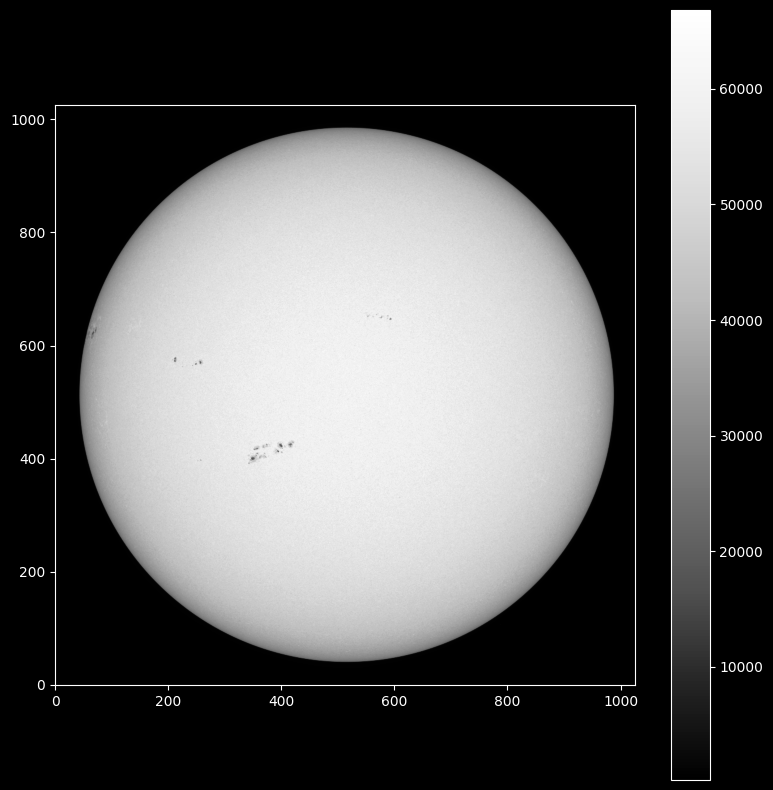

In [20]:
sMap = sunpy.map.Map(targetData)
sMap = sMap.resample((1024,1024)*u.pix)
sMap = sMap.rotate(order=3)
plt.figure(figsize=((8,8)))
figure = plt.imshow(sMap.data,cmap="Greys_r",origin="lower")
plt.colorbar()
plt.tight_layout()
plt.show()

In [21]:
maps = [((sunpy.map.Map(target)).resample((1024,1024)*u.pix)).rotate(order=3) for target in files]

In [22]:
def MapGeneration(i):
  plt.figure(figsize=(8,8))
  figure = plt.imshow(maps[i-0].data,cmap="Greys_r",origin="lower")
  plt.colorbar()
  plt.tight_layout()
  plt.show()

In [23]:
interactiveMap = interactive(
    MapGeneration,
    i=widgets.ToggleButtons(
        options=[1,2,3,4,5,6,7,8,9,10,11,12],
        value=1,
        description="File:",
        disabled=False
    )
)

In [42]:
interactiveMap

interactive(children=(ToggleButtons(description='File:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), valu…

**The realtionship between the x displacement and time is**:
> $x = A \cdot sin(\frac{2 \pi}{T} \cdot t)$

  where:

  $A$: the maximum displacement of a sunspot, at that solar latitude, from the line of 0 longitude ie the y-axis

  $T$: rotation period

  If we re-arrange our equation as follows:

  > $\arcsin(\frac{x}{A}) = \frac{2 \pi}{T} \cdot t$


**sunspot position examples:**

In [48]:
sunspot1 = np.array([[257,570],[307,573],[358,574],[411,575],[465,574],[520,575]])
sunspot2 = np.array([[172,628],[210,629],[251,630],[296,631],[343,632],[393,633]])
sunspot3 = np.array([[399,422],[453,424],[506,425],[559,424],[613,421],[666,419]])
sunspots = [sunspot1,sunspot2,sunspot3]

In [49]:
yAvg = [np.mean(ss[:,1]) for ss in sunspots]

In [51]:
# pixel positions are integers
np.floor(yAvg)

array([573., 630., 422.])

In [52]:
# we take 512 off these x positions to get the max displacement A from the y-axis
A = np.array([ 982, 971, 977])-512
A

array([470, 459, 465])

In [53]:
sunspotDisplacement = [ss-512 for ss in sunspots]
sunspotDisplacement

[array([[-255,   58],
        [-205,   61],
        [-154,   62],
        [-101,   63],
        [ -47,   62],
        [   8,   63]]),
 array([[-340,  116],
        [-302,  117],
        [-261,  118],
        [-216,  119],
        [-169,  120],
        [-119,  121]]),
 array([[-113,  -90],
        [ -59,  -88],
        [  -6,  -87],
        [  47,  -88],
        [ 101,  -91],
        [ 154,  -93]])]

In [55]:
arcSinx = [np.arcsin(sunspotDisplacement[index][:,0]/A[index]) for index in range(len(sunspots))]
arcSinx

[array([-0.57347357, -0.4513383 , -0.33382533, -0.2165829 , -0.10016742,
         0.0170221 ]),
 array([-0.83417232, -0.71809604, -0.60483633, -0.48995733, -0.37706336,
        -0.26225516]),
 array([-0.24546844, -0.12722465, -0.01290358,  0.10124817,  0.21894948,
         0.33755684])]

In [57]:
len(arcSinx[0])

6

In [58]:
# array of times from 0 to 60 hours with the same number of points (6) as arcsinxA
randomInterval = np.linspace(0,5,len(arcSinx[0]))*12

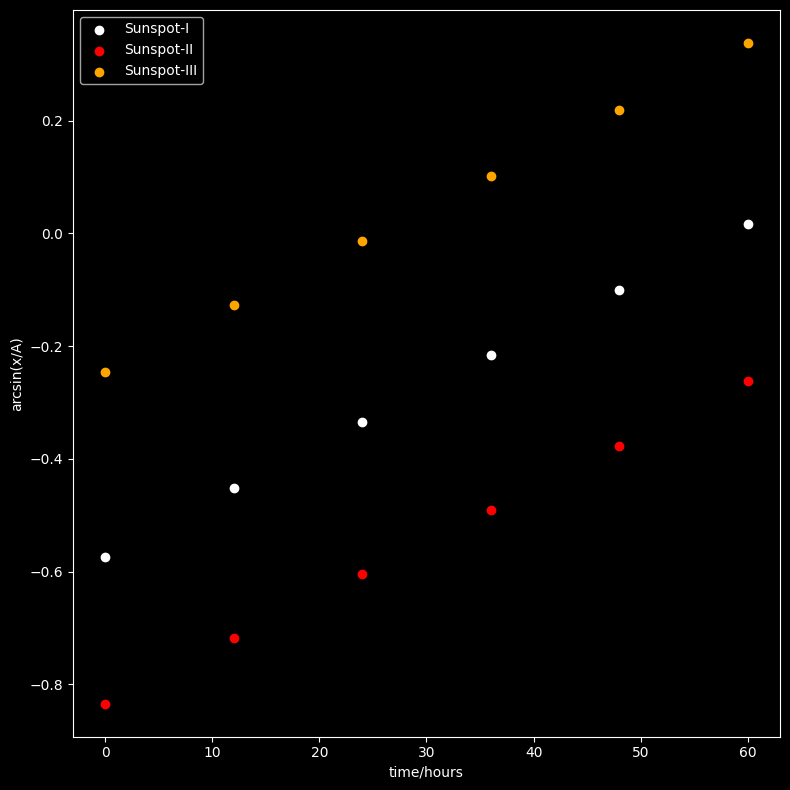

In [61]:
figure = plt.figure(num=2,figsize=(8,8))
axs = figure.add_subplot(111)
axs.scatter(randomInterval,arcSinx[0],label="Sunspot-I",c="white")
axs.scatter(randomInterval,arcSinx[1],label="Sunspot-II",c="red")
axs.scatter(randomInterval,arcSinx[2],label="Sunspot-III",c="orange")
axs.set_xlabel("time/hours")
axs.set_ylabel("arcsin(x/A)")
plt.tight_layout()
plt.legend()
plt.show()

In [62]:
fitValues = [np.polyfit(randomInterval,values,1) for values in arcSinx]
fitValues

[array([ 0.00981722, -0.57091091]),
 array([ 0.00951801, -0.8332703 ]),
 array([ 0.00968524, -0.24519755])]

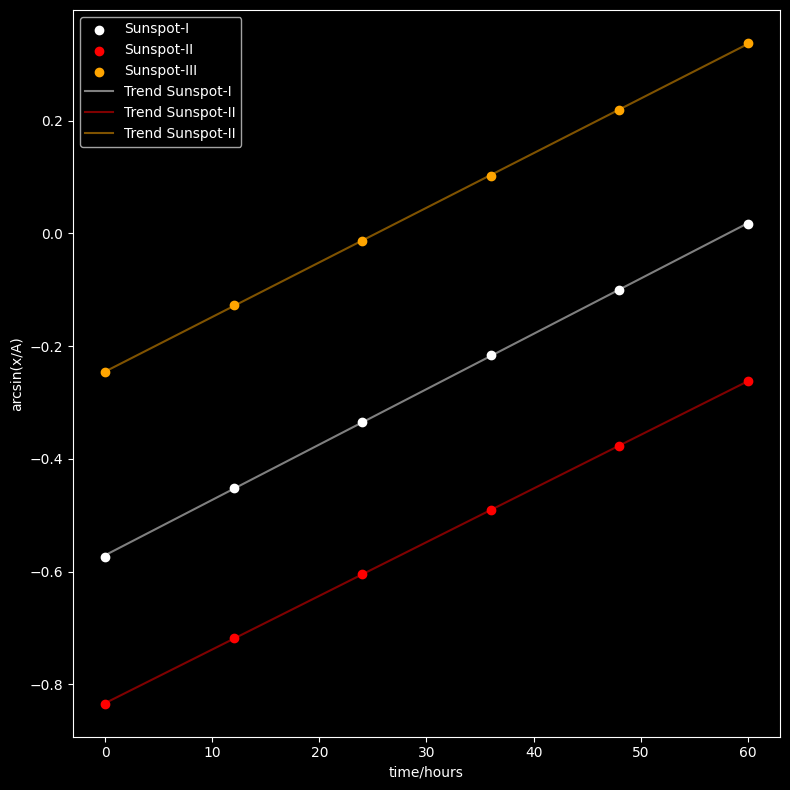

In [65]:
figure = plt.figure(num=2,figsize=(8,8))
axs = figure.add_subplot(111)
axs.scatter(randomInterval,arcSinx[0],label="Sunspot-I",c="white")
axs.scatter(randomInterval,arcSinx[1],label="Sunspot-II",c="red")
axs.scatter(randomInterval,arcSinx[2],label="Sunspot-III",c="orange")
axs.plot(randomInterval,fitValues[0][0]*randomInterval+fitValues[0][1],label="Trend Sunspot-I",c="white",alpha=0.5)
axs.plot(randomInterval,fitValues[1][0]*randomInterval+fitValues[1][1],label="Trend Sunspot-II",c="red",alpha=0.5)
axs.plot(randomInterval,fitValues[2][0]*randomInterval+fitValues[2][1],label="Trend Sunspot-II",c="orange",alpha=0.5)
axs.set_xlabel("time/hours")
axs.set_ylabel("arcsin(x/A)")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [66]:
# the formula T = 2pi/m to calculate the rotation period for each sunspot
rotationPeriod = [np.round(2*np.pi/values[0]/24,1) for values in fitValues]

In [67]:
rotationPeriod

[26.7, 27.5, 27.0]

In [69]:
latitudes = [np.round(degrees(np.arcsin((y-512)/512)),1) for y in yAvg]
latitudes

[6.9, 13.4, -10.1]

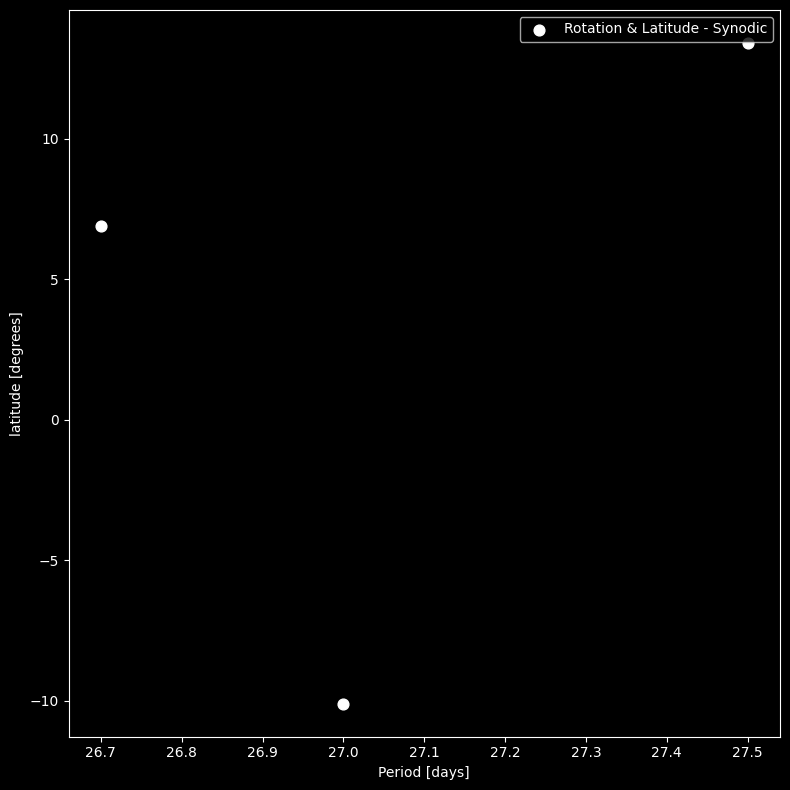

In [72]:
figure = plt.figure(num=3,figsize=(8,8))
axs = figure.add_subplot(111)
axs.scatter(rotationPeriod,latitudes,label="Rotation & Latitude - Synodic",c="white",s=60)
axs.set_xlabel("Period [days]")
axs.set_ylabel("latitude [degrees]")
plt.tight_layout()
plt.legend()
plt.show()

In [74]:
latitudeTheory = np.arange(-90,90,1)*u.deg

In [75]:
timeStep = 1*u.day

In [84]:
rotationRate = [diff_rot(timeStep,lat)/timeStep for lat in latitudeTheory]
rotationPeriod = [360*u.deg/lat for lat in rotationRate]

In [85]:
converting = 360/365.25

In [86]:
# the formula T = 2pi/m to calculate the rotation period for each sunspot
periods = [np.round(2*np.pi/values[0]/24,1) for values in fitValues]

In [88]:
periods

[26.7, 27.5, 27.0]

In [87]:
degPerDay = [360/p+converting for p in periods]
periodNew = [360/d for d in degPerDay]

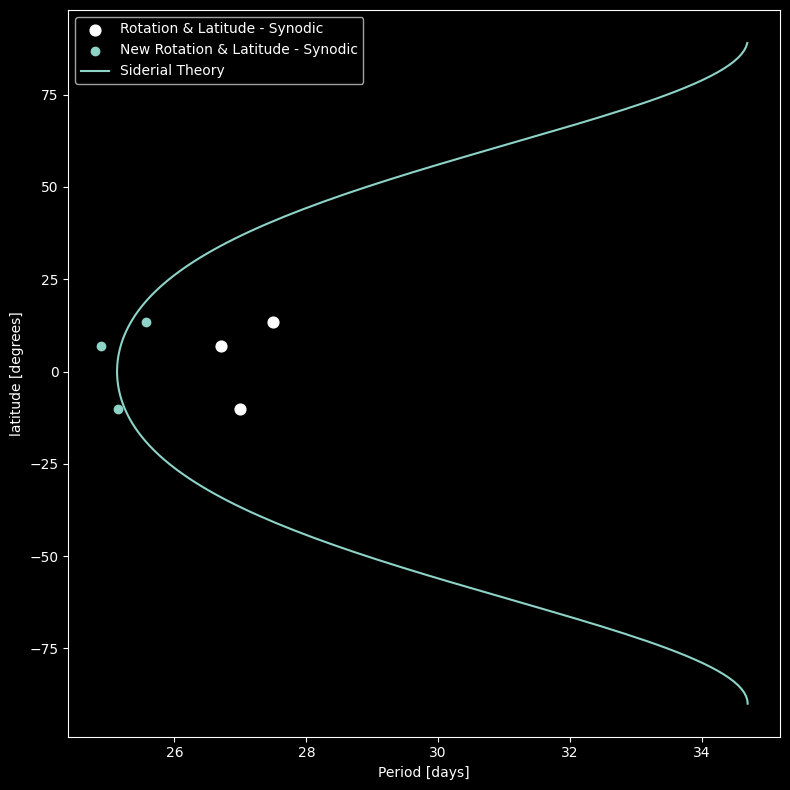

In [91]:
figure = plt.figure(num=3,figsize=(8,8))
axs = figure.add_subplot(111)
axs.scatter(periods,latitudes,label="Rotation & Latitude - Synodic",c="white",s=60)
axs.scatter(periodNew,latitudes,label="New Rotation & Latitude - Synodic")
axs.plot([r.value for r in rotationPeriod],latitudeTheory,label="Siderial Theory")
axs.set_xlabel("Period [days]")
axs.set_ylabel("latitude [degrees]")
plt.tight_layout()
plt.legend()
plt.show()